# Import Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import gdown
! mkdir .kaggle

file_id = "19TDXo4E63qWEwu_ulr4Ibn_5A7aWch2B"
output_file = ".kaggle/kaggle.json"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)

mkdir: cannot create directory ‘.kaggle’: File exists


Downloading...
From: https://drive.google.com/uc?id=19TDXo4E63qWEwu_ulr4Ibn_5A7aWch2B
To: /content/.kaggle/kaggle.json
100%|██████████| 69.0/69.0 [00:00<00:00, 190kB/s]


'.kaggle/kaggle.json'

In [ ]:
! pip install kaggle --quiet
! chmod 600 .kaggle/kaggle.json

!kaggle datasets download -d shuvoalok/ck-dataset

! mkdir data
! unzip {"ck-dataset.zip"} -d data

Dataset URL: https://www.kaggle.com/datasets/shuvoalok/ck-dataset
License(s): other
ck-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘data’: File exists
Archive:  ck-dataset.zip
replace data/anger/S010_004_00000017.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/anger/S010_004_00000017.png  
  inflating: data/anger/S010_004_00000018.png  
  inflating: data/anger/S010_004_00000019.png  
  inflating: data/anger/S011_004_00000019.png  
  inflating: data/anger/S011_004_00000020.png  
  inflating: data/anger/S011_004_00000021.png  
  inflating: data/anger/S014_003_00000028.png  
  inflating: data/anger/S014_003_00000029.png  
  inflating: data/anger/S014_003_00000030.png  
  inflating: data/anger/S022_005_00000030.png  
  inflating: data/anger/S022_005_00000031.png  
  inflating: data/anger/S022_005_00000032.png  
  inflating: data/anger/S026_003_00000013.png  
  inflating: data/anger/S026_003_000

# Data Preprocessing

Text(0.5, 1.0, 'surprised')

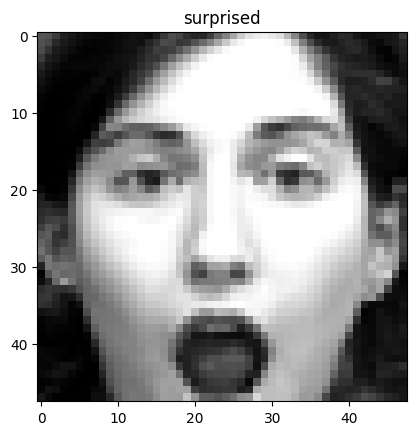

In [ ]:
# Load Image
import matplotlib.pyplot as plt
from skimage.io import imread

plt.imshow(imread('data/surprise/S077_001_00000027.png'), cmap='gray')
plt.title('surprised')

Text(0.5, 1.0, 'anger')

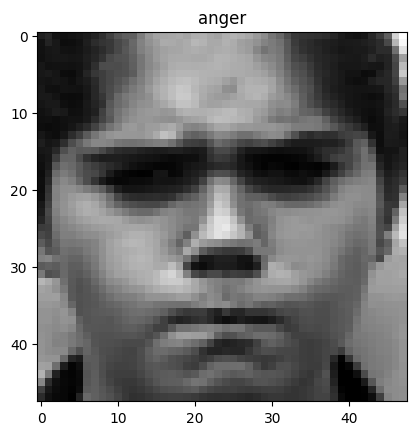

In [ ]:
plt.imshow(imread('/content/data/anger/S011_004_00000020.png'), cmap='gray')
plt.title('anger')

In [ ]:
import os
import pickle
from skimage.io import imread
input_dir = '/content/data/'
class_names = ['anger', 'contempt', 'disgust',
              'fear', 'happy', 'sadness',
              'surprise']
cat_to_idx = {}
idx_to_cat = {}

X = []
y = []
for category_idx, category in enumerate(class_names):
    seen_prefixes = set()
    cat_to_idx[category] = category_idx
    idx_to_cat[category_idx] = category
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        prefix =  "_".join(file.split('_')[:-1])
        img = imread(img_path, as_gray=True)
        X.append(img)
        y.append(category_idx)

In [ ]:
cat_to_idx

{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'sadness': 5,
 'surprise': 6}

In [ ]:
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int32)

In [ ]:
X.shape

(981, 48, 48)

In [ ]:
y.shape

(981,)

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

IMG_SIZE = (48, 48)
BATCH_SIZE = 32

# Data standardization
X = X / 255.0
X = X.reshape(-1, 48, 48, 1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, stratify=y,
                                                    test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp,
                                                test_size=0.5, random_state=42)

# Flattening data for traditional method
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

y_train_flat = y_train
y_test_flat = y_test


# Convert to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE).shuffle(len(X_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)

# Example: Inspect dataset shapes
for images, labels in train_dataset.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

Image batch shape: (32, 48, 48, 1)
Label batch shape: (32,)


In [ ]:
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)

X_train shape: (686, 48, 48, 1)
X_val shape: (147, 48, 48, 1)
X_test shape: (148, 48, 48, 1)


In [ ]:
def convert_to_rgb(image, label):
    '''Convert 1-channel to 3-channel'''
    image = tf.image.grayscale_to_rgb(image)
    return image, label

train_dataset = train_dataset.map(convert_to_rgb)
validation_dataset = validation_dataset.map(convert_to_rgb)
test_dataset = test_dataset.map(convert_to_rgb)

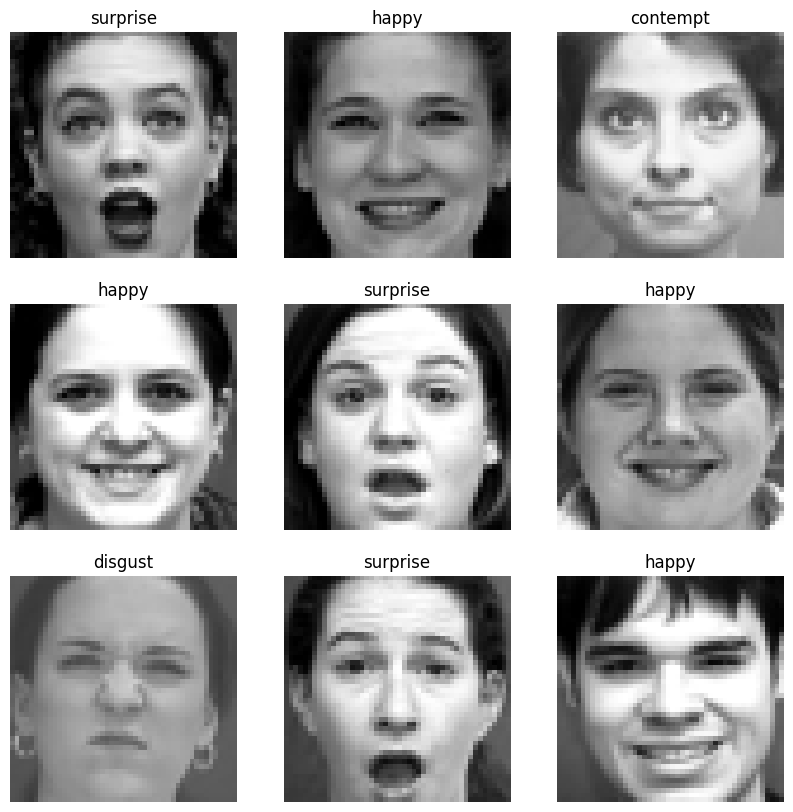

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze())
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 5
Number of test batches: 5


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [ ]:
# Debug augmented image
augmented_image = data_augmentation(tf.expand_dims(images[0], 0))  # Augment first image
print(f"Augmented image range: min={tf.reduce_min(augmented_image)}, max={tf.reduce_max(augmented_image)}")

Augmented image range: min=0.0, max=0.9341850280761719


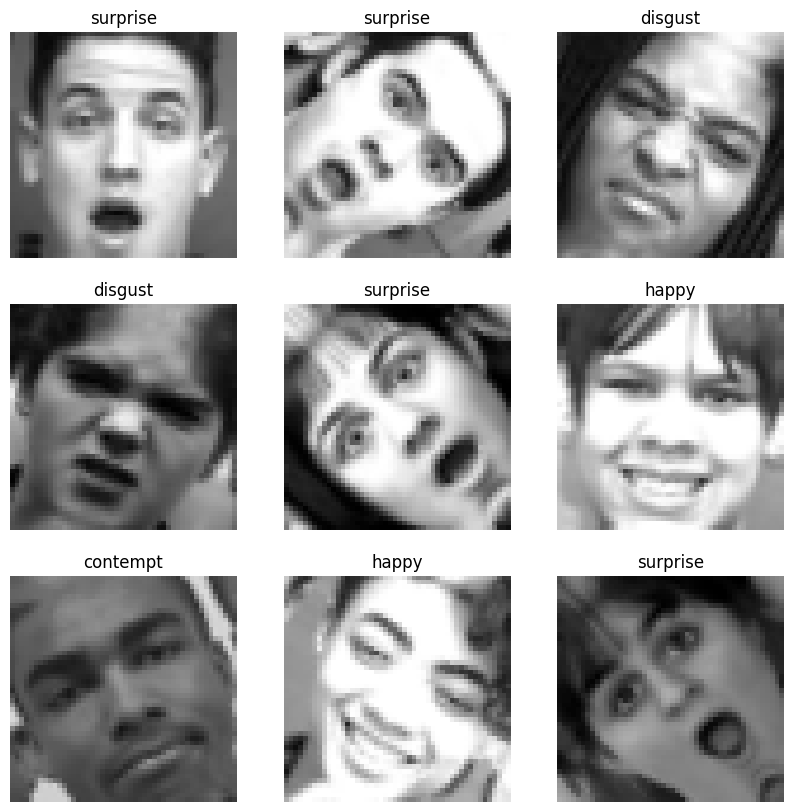

In [ ]:
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        current_image = images[i]
        augmented_image = data_augmentation(tf.expand_dims(current_image, 0))
        augmented_image = tf.squeeze(augmented_image, axis=0)

        augmented_image = tf.clip_by_value(augmented_image, 0, 1)

        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image.numpy())
        plt.title(class_names[labels[i].numpy()])
        plt.axis('off')

# Traditional Method

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_flat, y_train_flat)
print(grid_search.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
svm_clf = grid_search.best_estimator_

In [ ]:
svm_clf.fit(X_train_flat, y_train_flat)

SVC(C=1, kernel='linear')

In [ ]:
y_pred = svm_clf.predict(X_test_flat)

In [ ]:
print(classification_report(y_test_flat, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        38

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

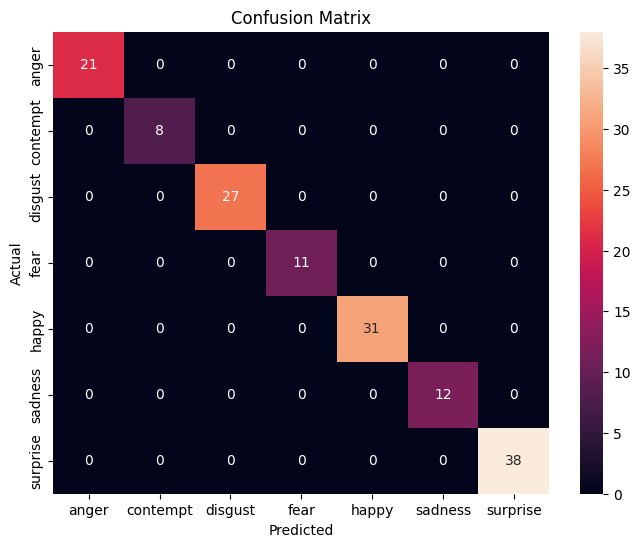

In [ ]:
cm = confusion_matrix(y_test_flat, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm_clf, X_train_flat, y_train_flat, cv=skf, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))


Cross-Validation Scores: [0.97101449 0.95620438 0.95620438 0.96350365 0.94160584]
Mean Accuracy: 0.9577065481857613


# Deep Learning (Convolutional Neural Network)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,069,271 (4.08 MB)

 Trainable params: 356,423 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 712,848 (2.72 MB)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=[early_stopping]
)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.1988 - loss: 1.8687 - val_accuracy: 0.4082 - val_loss: 1.7843
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.2926 - loss: 1.7652 - val_accuracy: 0.4422 - val_loss: 1.5794
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.5038 - loss: 1.5212 - val_accuracy: 0.6054 - val_loss: 1.1515
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6649 - loss: 0.9657 - val_accuracy: 0.7075 - val_loss: 0.8357
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.7077 - loss: 0.8046 - val_accuracy: 0.8027 - val_loss: 0.6631
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.7596 - loss: 0.6750 - val_accuracy: 0.8503 - val_loss: 0.5176
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.7896 - loss: 0.5222 - val_accuracy: 0.8299 - val_loss: 0.5159
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.8295 - loss: 0.4424 - val_accu

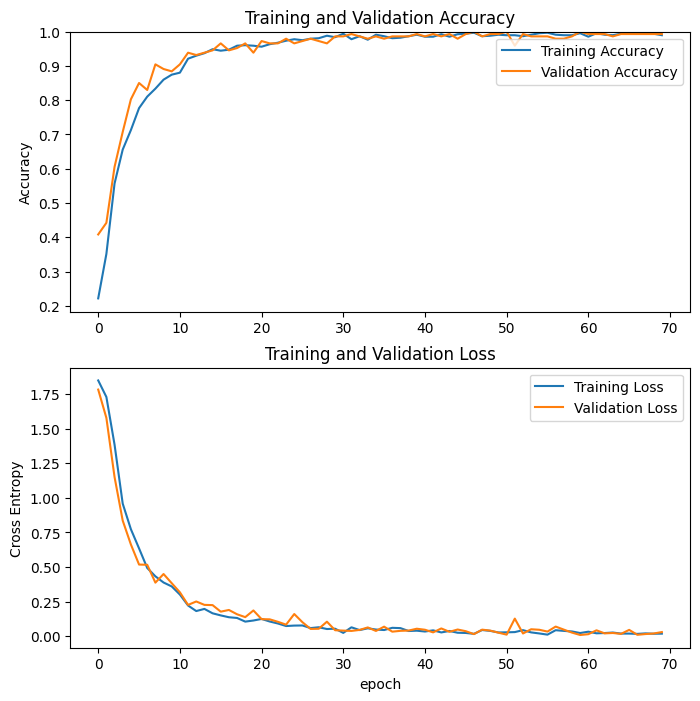

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
y_pred = model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)
y_test_flat = np.concatenate([y for x, y in test_dataset], axis=0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        27
           3       1.00      0.91      0.95        11
           4       0.97      1.00      0.98        31
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        38

    accuracy                           0.99       148
   macro avg       1.00      0.99      0.99       148
weighted avg       0.99      0.99      0.99       148



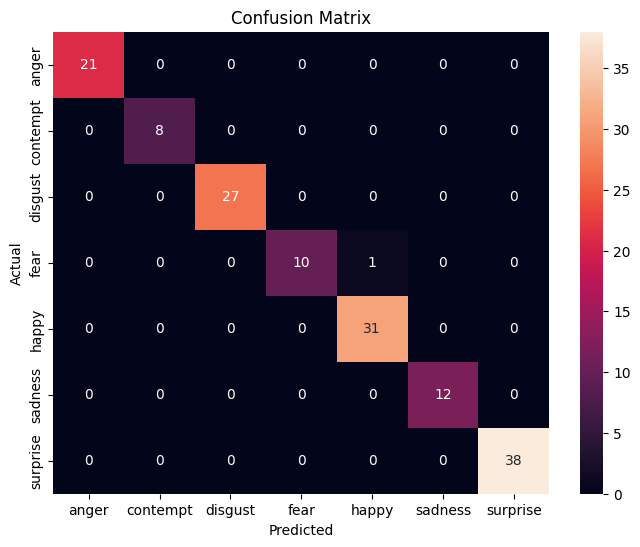

In [ ]:
print(classification_report(y_test_flat, y_pred))

cm = confusion_matrix(y_test_flat, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Transfer Learning (RestNet50)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

rescale = tf.keras.layers.Rescaling(1./255)  # ResNet50 typically expects [0, 1] range, not [-1, 1]

# Load the pre-trained ResNet50 model
IMG_SHAPE = IMG_SIZE + (3,)
restnet_base_model = ResNet50(input_shape=IMG_SHAPE,
                      include_top=False,  # Exclude the fully connected top layer
                      weights='imagenet')

# Test the model on a batch of images
image_batch, label_batch = next(iter(train_dataset))
feature_batch = restnet_base_model(preprocess_input(image_batch))
print(feature_batch.shape)

(32, 2, 2, 2048)


In [ ]:
restnet_base_model.trainable = False
restnet_base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 48, 48, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 54, 54, 3)      │              0 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 24, 24, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 24, 24, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 24, 24, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 26, 26, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 12, 12, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 12, 12, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 12, 12, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 12, 12, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 12, 12, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [ ]:
num_classes = 7

prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 7)


In [ ]:
inputs = tf.keras.Input(shape=(48, 48, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = restnet_base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 48, 48, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_3 (Sequential) │ (None, 48, 48, 3)      │              0 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_12 (GetItem)     │ (None, 48, 48)         │              0 │ sequential_3[1][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_13 (GetItem)     │ (None, 48, 48)         │              0 │ sequential_3[1][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_14 (GetItem)     │ (None, 48, 48)         │              0 │ sequential_3[1][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack_4 (Stack)           │ (None, 48, 48, 3)      │              0 │ get_item_12[0][0],     │
│                           │                        │                │ get_item_13[0][0],     │
│                           │                        │                │ get_item_14[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 48, 48, 3)      │              0 │ stack_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 2, 2, 2048)     │     23,587,712 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 2048)           │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 7)              │         14,343 │ dropout_4[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,602,055 (90.03 MB)

 Trainable params: 14,343 (56.03 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
len(model.trainable_variables)

2

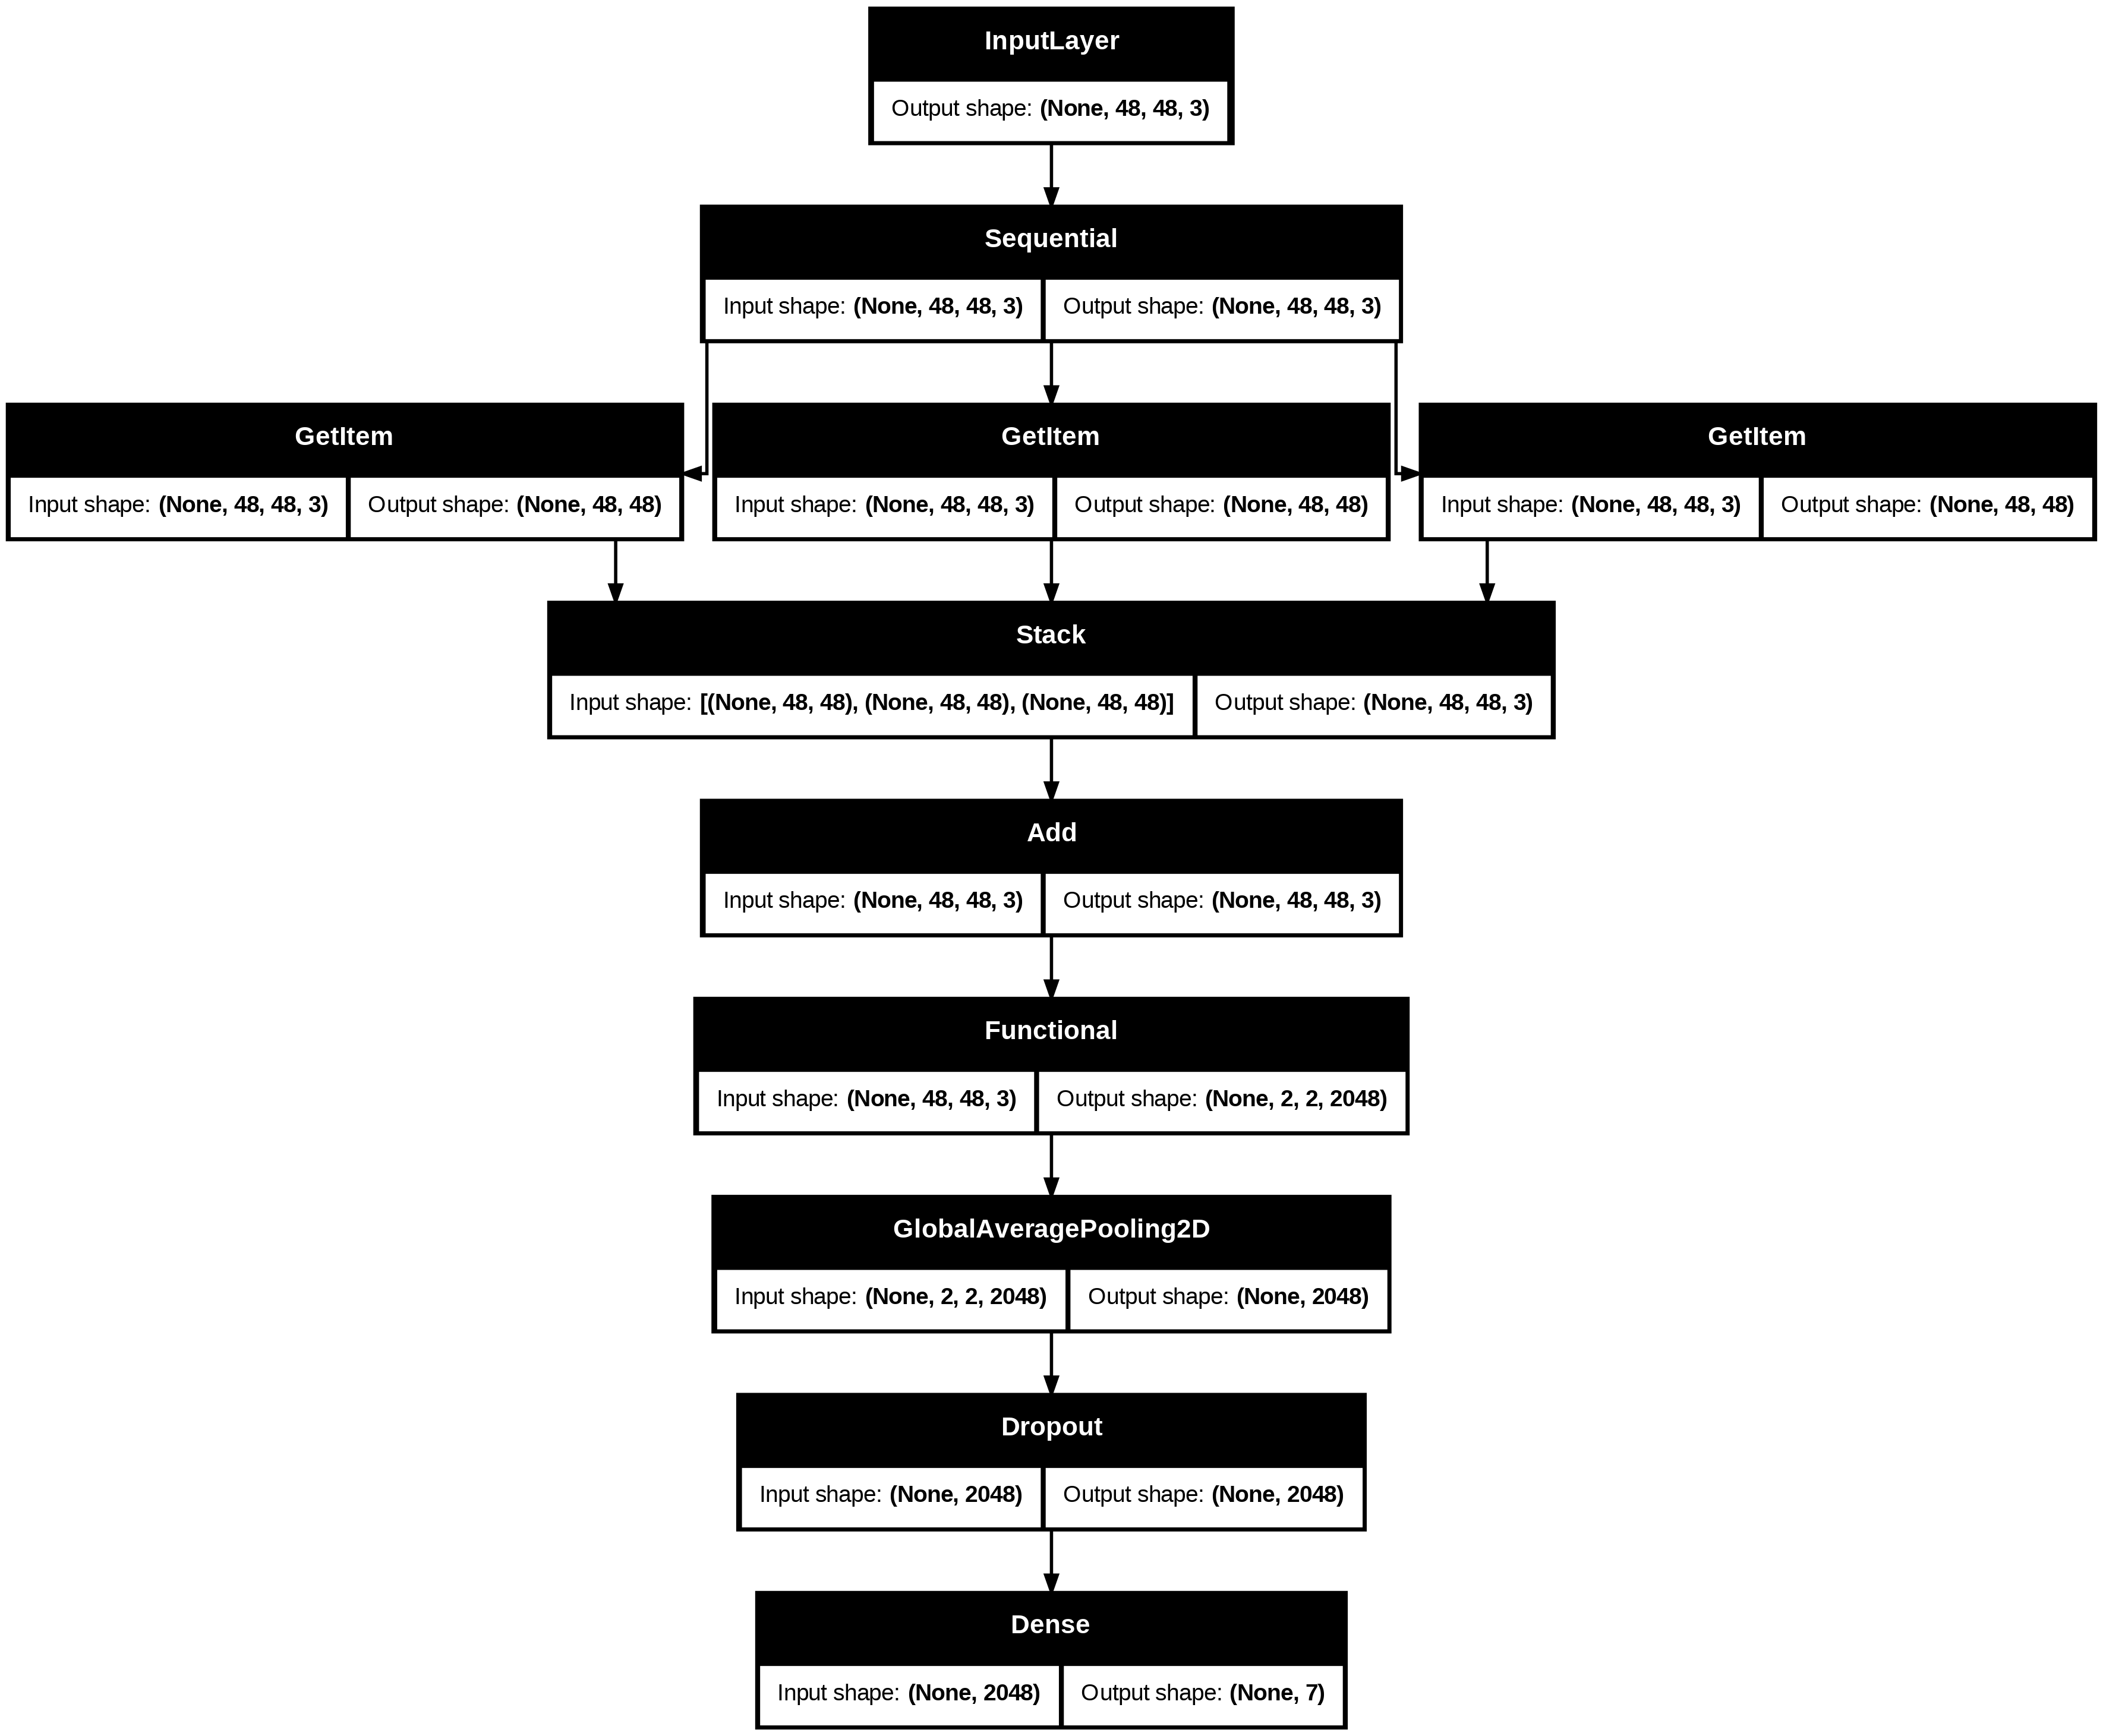

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
base_learning_rate = 0.0001
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Using GPU:", gpus)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2221 - loss: 2.2833


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.33
initial accuracy: 0.23


In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.1826 - loss: 2.0962 - val_accuracy: 0.2245 - val_loss: 1.8860
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2161 - loss: 1.9317 - val_accuracy: 0.2517 - val_loss: 1.8336
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2274 - loss: 1.8839 - val_accuracy: 0.2517 - val_loss: 1.7993
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2537 - loss: 1.8726 - val_accuracy: 0.3061 - val_loss: 1.7843
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2413 - loss: 1.8433 - val_accuracy: 0.3129 - val_loss: 1.7711
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.2509 - loss: 1.8452 - val_accuracy: 0.3537 - val_loss: 1.7534
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2640 - loss: 1.8298 - val_accuracy: 0.4490 - val_loss: 1.7359
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2913 - loss: 1.7560 - val_accuracy: 0.3061 - v

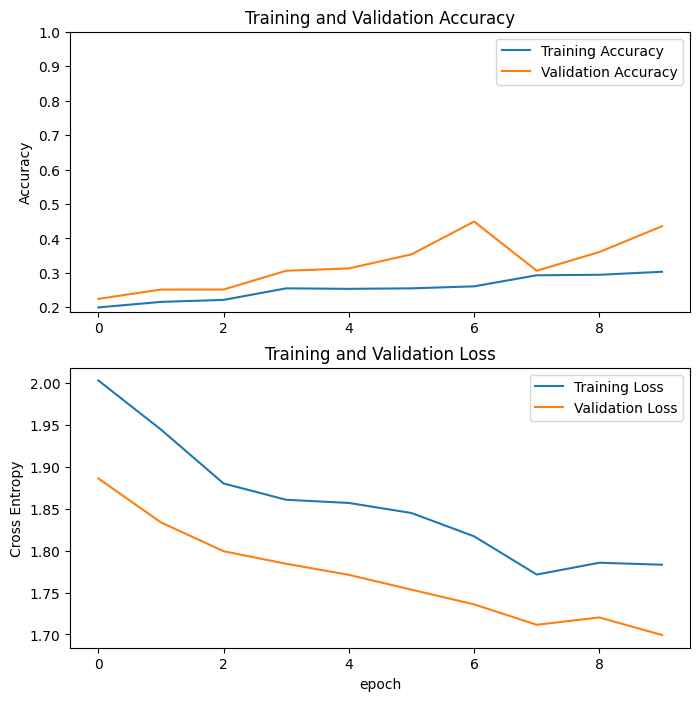

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Fine-Tuning Transfer Learning Model

In [ ]:
restnet_base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(restnet_base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in restnet_base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  175


In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 48, 48, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_3 (Sequential) │ (None, 48, 48, 3)      │              0 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_12 (GetItem)     │ (None, 48, 48)         │              0 │ sequential_3[1][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_13 (GetItem)     │ (None, 48, 48)         │              0 │ sequential_3[1][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_14 (GetItem)     │ (None, 48, 48)         │              0 │ sequential_3[1][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack_4 (Stack)           │ (None, 48, 48, 3)      │              0 │ get_item_12[0][0],     │
│                           │                        │                │ get_item_13[0][0],     │
│                           │                        │                │ get_item_14[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 48, 48, 3)      │              0 │ stack_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 2, 2, 2048)     │     23,587,712 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 2048)           │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 7)              │         14,343 │ dropout_4[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,602,055 (90.03 MB)

 Trainable params: 19,467,271 (74.26 MB)

 Non-trainable params: 4,134,784 (15.77 MB)

In [ ]:
len(model.trainable_variables)

92

In [ ]:
import tensorflow as tf

class StopAtAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy):
        super(StopAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= self.target_accuracy:
            print(f"\nStopping training as accuracy reached {self.target_accuracy * 100:.2f}%")
            self.model.stop_training = True

stop_at_98_accuracy = StopAtAccuracy(target_accuracy=0.98)

In [ ]:
fine_tune_epochs = 10000
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=len(history.epoch),
                         validation_data=validation_dataset,
                         callbacks=[stop_at_98_accuracy])

Epoch 11/10010
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 131ms/step - accuracy: 0.2824 - loss: 2.2214 - val_accuracy: 0.2245 - val_loss: 1.7356
Epoch 12/10010
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3374 - loss: 1.9400 - val_accuracy: 0.2245 - val_loss: 1.7478
Epoch 13/10010
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3962 - loss: 1.7930 - val_accuracy: 0.2245 - val_loss: 1.7740
Epoch 14/10010
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3759 - loss: 1.7876 - val_accuracy: 0.2245 - val_loss: 1.8011
Epoch 15/10010
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3998 - loss: 1.7049 - val_accuracy: 0.2653 - val_loss: 1.7528
Epoch 16/10010
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4558 - loss: 1.6443 - val_accuracy: 0.4150 - val_loss: 1.6546
Epoch 17/10010
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.4685 - loss: 1.4321 - val_accuracy: 0.3333 - val_loss: 1.7135
Epoch 18/10010
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.4659 - loss:

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

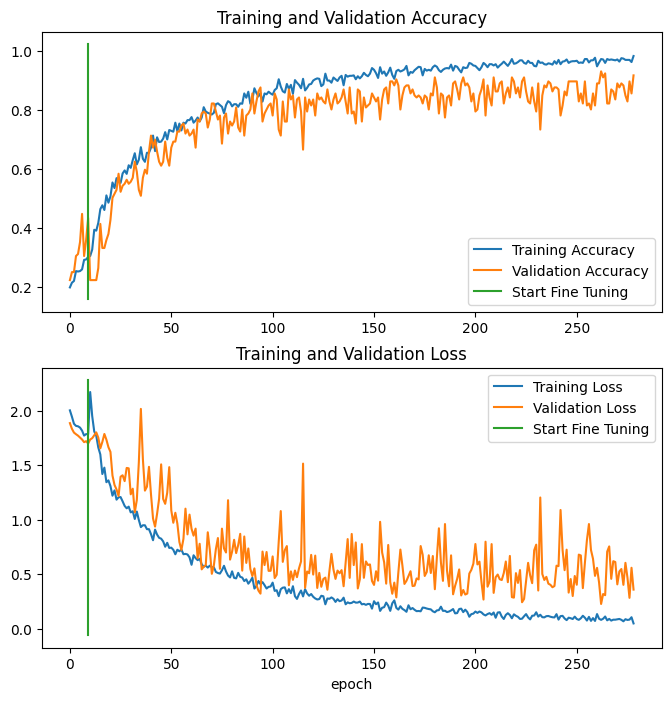

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Evaluation and Prediction

In [ ]:
loss, accuracy = model.evaluate(test_dataset)

print('Test accuracy :', accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9312 - loss: 0.2517
Test accuracy : 0.912162184715271


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Predict on the entire test dataset
y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = model(images, training=False)
    predictions = tf.argmax(predictions, axis=-1)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions.numpy())

precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred, average='macro', zero_division=0)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")


Test Precision: 0.9179
Test Recall: 0.8621


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


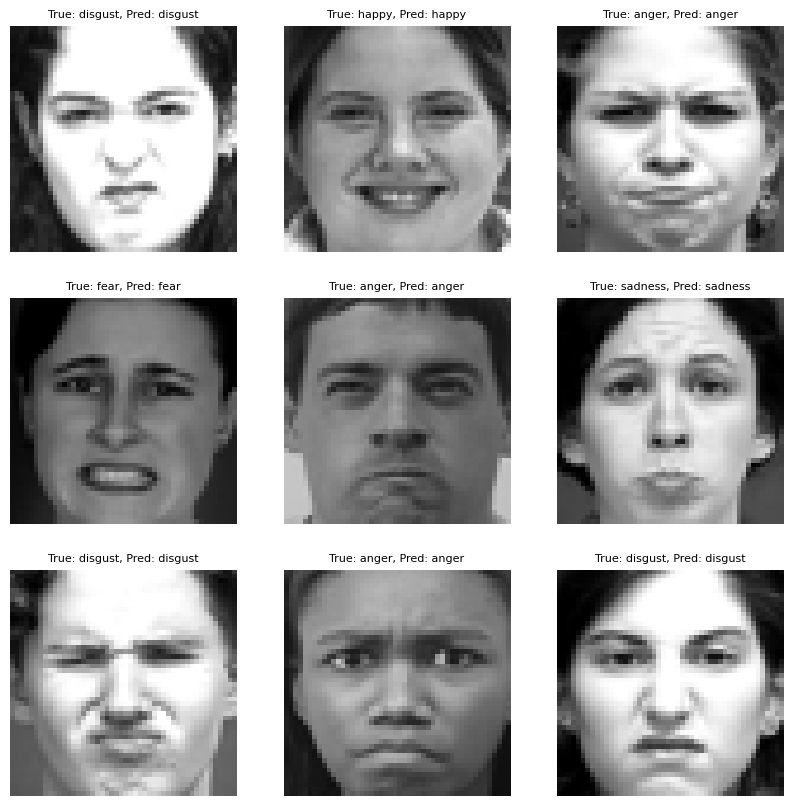

In [ ]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict(image_batch)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

plt.figure(figsize=(10, 10))
start_idx = 0  # Starting index for visualization
for i in range(start_idx, start_idx + 9):
    ax = plt.subplot(3, 3, i - start_idx + 1)
    img = image_batch[i]

    img = ((img + 1) * 127.5).astype("uint8") if img.min() < 0 else (img * 255).astype("uint8")
    if img.shape[-1] == 1:
        img = img.squeeze(-1)
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)

    true_label = class_names[label_batch[i]]
    predicted_label = class_names[predicted_classes[i]]

    plt.title(f"True: {true_label}, Pred: {predicted_label}", fontsize=8)
    plt.axis("off")

plt.show()

Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


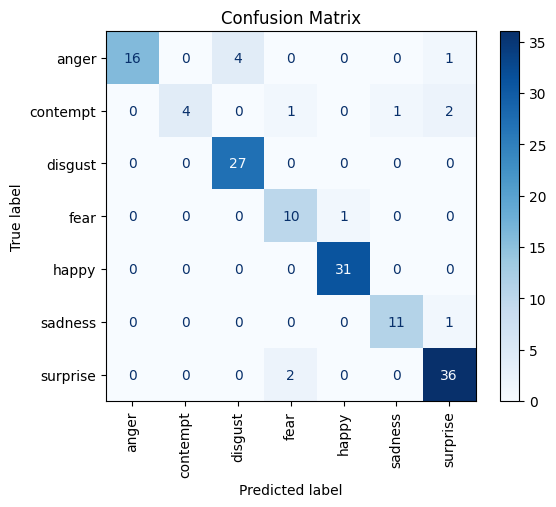

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = []
y_pred = []

for image_batch, label_batch in test_dataset:
    predictions = model.predict(image_batch)
    predicted_classes = tf.argmax(predictions, axis=1).numpy()

    y_true.extend(label_batch.numpy())
    y_pred.extend(predicted_classes)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap="Blues", xticks_rotation="vertical", values_format="d")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score

image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)
predicted_classes = np.argmax(predictions, axis=1)

true_labels = label_batch

class_metrics = {}
for class_id in range(7):
    class_indices = np.where(true_labels == class_id)[0]

    if len(class_indices) == 0:
        continue

    class_predictions = predicted_classes[class_indices]
    correct_predictions = np.sum(class_predictions == class_id)

    # Calculate the metrics
    class_accuracy = correct_predictions / len(class_indices)
    class_precision = precision_score(true_labels[class_indices], class_predictions, average='binary', pos_label=class_id)
    class_recall = recall_score(true_labels[class_indices], class_predictions, average='binary', pos_label=class_id)

    # Store the metrics
    class_metrics[class_id] = {
        'Accuracy': class_accuracy,
        'Precision': class_precision,
        'Recall': class_recall
    }

class_metrics_df = pd.DataFrame(class_metrics).T
class_metrics_df

,Accuracy,Precision,Recall
0,1.0,1.0,1.0
1,0.5,1.0,0.5
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0
5,1.0,1.0,1.0
6,1.0,1.0,1.0


In [ ]:
# Save the entire model
model.save("restnet50_fer.keras")

In [ ]:
# Save only the model weights
model.save_weights("restnet50_fer.weights.h5")

In [ ]:
# Example on how to load models:
# model = tf.keras.models.load_model("restnet50_fer.keras")